In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

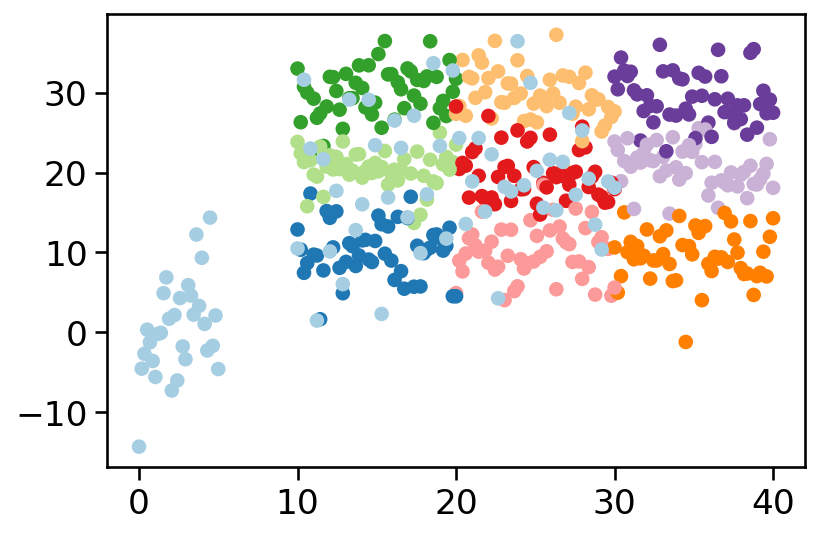

In [2]:
def make_clusters(wide, height, size, x0=0, y=0, mark=0):
    x=np.linspace(x0, x0+wide, size)
    y=np.random.normal(y, height, size=(size,))
    mark = np.ones(size, dtype='int32') * mark
    return pd.DataFrame({'x1': x, 'x2': y, 'mark': mark})
    


colors = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])
data = make_clusters(5, 5, 30)
n = 1
for i in range(3):
    for j in range(3):
        data = pd.concat( (data, make_clusters(10, 3, 50, (i+1)*10, (j+1)*10, n) ), ignore_index=True)
        n+=1
data = data.sample(frac=1).reset_index(drop=True)
data = pd.concat( (data, make_clusters(20, 10, 50, 10, 20, 0) ), ignore_index=True)
fig, ax = plt.subplots(dpi=150)
ax.scatter(data.x1, data.x2, c=colors[data.mark])

In [3]:
data.head()
X = data.drop(columns=['mark'])
y = data['mark']

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=42, oob_score=True)
clf.fit(X, y)

D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, oob_score=True, random_state=42)

In [5]:
clf.oob_score_

0.7113207547169811

In [6]:
xx, yy = np.meshgrid(np.linspace(-2, 40, 50), np.linspace(-20, 40, 50)) 
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
predicted

array([[0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       ...,
       [3, 3, 3, ..., 9, 9, 9],
       [3, 3, 3, ..., 9, 9, 9],
       [3, 3, 3, ..., 9, 9, 9]])

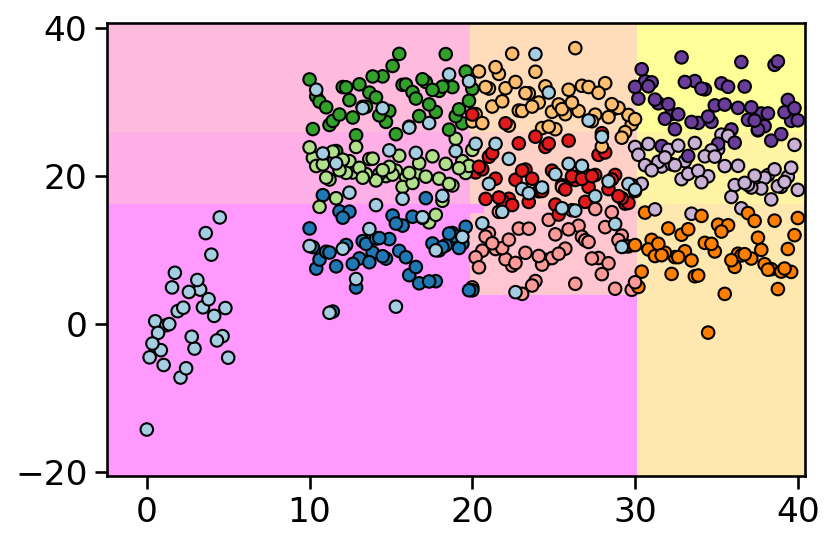

In [8]:
fig, ax = plt.subplots(dpi=150)

ax.pcolormesh(xx, yy, predicted, cmap='spring', alpha=0.4)
ax.scatter(data.x1, data.x2, c=colors[data.mark], edgecolors='black')

In [9]:
titanic = pd.read_csv('files/titanic.csv')
data = titanic.copy()
data[['Age', 'Fare']] = data[['Age', 'Fare']].fillna(data[['Age', 'Fare']].mean())

from sklearn.model_selection import StratifiedKFold as SK
from sklearn.model_selection import train_test_split

y = data['Survived']
X = data.drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
765,766,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
339,340,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
374,375,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
183,184,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


In [77]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical = ['Sex']
numeric_features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
column_transformer = ColumnTransformer([
    ('ohe', OrdinalEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features) # how to not scaling?
])

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regression', RandomForestClassifier(max_depth=7, n_estimators=100, random_state=42))
])
model = pipeline.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
tn, fp, fn, tp 
P = tp/(tp+fp)
R = tp/(tp+fn)
'Precision = {:5.2f}, Recall = {:5.2f}'.format(P, R) #'Precision =  0.76, Recall =  0.68'

'Precision =  0.78, Recall =  0.73'

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param = np.arange(50, 500, 50)
# searcher = GridSearchCV(pipeline, [{'regression__n_estimators': param}], cv=10)
# searcher.fit(X_train, y_train)
# searcher.best_params_['regression__n_estimators']

100

In [75]:
from sklearn.metrics import roc_auc_score
b = model.predict_proba(X_test)[:, 1]
print('{:6.3f}'.format(roc_auc_score(y_test, b)))

 0.884
